<a href="https://colab.research.google.com/github/alexandrufalk/Background-generator/blob/Layout-page/01_Neural_Network_Regression_tensorflow_exercise_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/Colab Notebooks"


 00_tensorflow_fundamentals.ipynb
'01_Neural_Network_Regression_tensorflow_exercise .ipynb'
 01_Neural_Network_Regression_tensorflow.ipynb
 honey_purity_dataset.csv


In [5]:
# File path of the CSV file in Google Drive

file_path = '/content/drive/My Drive/Colab Notebooks/honey_purity_dataset.csv'

# Import necessary libraries
import pandas as pd

# Read CSV file into a DataFrame
df = pd.read_csv(file_path)

df.head()

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62


In [6]:
# One hot encoding of dataset
df_one_hot=pd.get_dummies(df)
df_one_hot.head()

,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Price,...,Pollen_analysis_Heather,Pollen_analysis_Lavender,Pollen_analysis_Manuka,Pollen_analysis_Orange Blossom,Pollen_analysis_Rosemary,Pollen_analysis_Sage,Pollen_analysis_Sunflower,Pollen_analysis_Thyme,Pollen_analysis_Tupelo,Pollen_analysis_Wildflower
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,4844.50,0.68,645.24,...,0,0,0,0,0,0,0,0,0,0
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,6689.02,0.89,385.85,...,0,0,0,0,0,0,0,0,0,0
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,6883.60,0.66,639.64,...,0,0,0,0,0,0,0,0,0,0
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,7167.56,1.00,946.46,...,0,0,0,0,0,0,0,0,0,0
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,5125.44,1.00,432.62,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# counting unique values
n = len(pd.unique(df['Pollen_analysis']))
n

19

In [10]:
# Create X and y
X=df_one_hot.drop("Price",axis=1)
y=df_one_hot["Price"]
X.head(),y.head()

(     CS  Density     WC    pH    EC      F      G  Viscosity  Purity  \
 0  2.81     1.75  23.04  6.29  0.76  39.02  33.63    4844.50    0.68   
 1  9.47     1.82  17.50  7.20  0.71  38.15  34.41    6689.02    0.89   
 2  4.61     1.84  23.72  7.31  0.80  27.47  34.36    6883.60    0.66   
 3  1.77     1.40  16.61  4.01  0.78  31.52  28.15    7167.56    1.00   
 4  6.11     1.25  19.63  4.82  0.90  29.65  42.52    5125.44    1.00   
 
    Pollen_analysis_Acacia  ...  Pollen_analysis_Heather  \
 0                       0  ...                        0   
 1                       0  ...                        0   
 2                       0  ...                        0   
 3                       0  ...                        0   
 4                       0  ...                        0   
 
    Pollen_analysis_Lavender  Pollen_analysis_Manuka  \
 0                         0                       0   
 1                         0                       0   
 2                         0  

In [13]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42)
len(X_test), len(y_test), len(X_train), len(y_train)

(49581, 49581, 198322, 198322)

In [15]:
# Creating the model

#Set random seed
tf.random.set_seed(42)

#1. Create the model
honey_model=tf.keras.Sequential([tf.keras.layers.Dense(10),
                                 tf.keras.layers.Dense(1)])
#2. Compile the model
honey_model.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.SGD(),
                    metrics=["mae"])

#3. Fit the model
honey_model.fit(X_train,y_train,epochs=100, verbose=0)

In [16]:
# Check the results of the model
honey_model.evaluate(X_test,y_test)

1550/1550 [==============================] - 1s 835us/step - loss: nan - mae: nan


[nan, nan]

In [20]:
# Creating the 2nd model

#Set random seed
tf.random.set_seed(42)

#1. Create the model
honey_model2=tf.keras.Sequential([tf.keras.layers.Dense(10),
                                 tf.keras.layers.Dense(1)])
#2. Compile the model
honey_model2.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                    metrics=["mae"])

#3. Fit the model
history=honey_model2.fit(X_train,y_train,epochs=100, verbose=0)

In [21]:
# Check the results of the model
honey_model2.evaluate(X_test,y_test)

1550/1550 [==============================] - 5s 3ms/step - loss: 33.0874 - mae: 33.0874


[33.087371826171875, 33.087371826171875]

Text(0.5, 0, 'epochs')

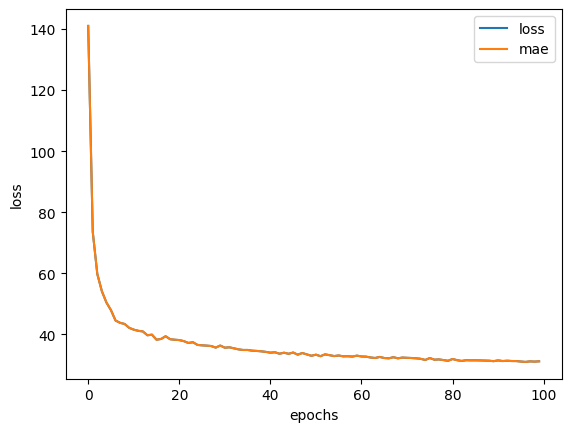

In [22]:
# Plot history - loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [23]:
# Creating the 3th model

#Set random seed
tf.random.set_seed(42)


# Define EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore weights to the best value observed during training
)

#1. Create the model
honey_model3=tf.keras.Sequential([tf.keras.layers.Dense(15),
                                 tf.keras.layers.Dense(1)])
#2. Compile the model
honey_model3.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                    metrics=["mae"])
#3. Fit the model with EarlyStopping callback
history2 = honey_model3.fit(
    X_train,
    y_train,
    epochs=150,
    verbose=0,
    validation_split=0.2,  # Specify validation data
    callbacks=[early_stopping]  # Pass EarlyStopping callback
)

In [24]:
# Check the results of the model

loss, mae = honey_model3.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test MAE:", mae)

1550/1550 [==============================] - 6s 4ms/step - loss: 33.0084 - mae: 33.0084
Test Loss: 33.00835418701172
Test MAE: 33.00835418701172


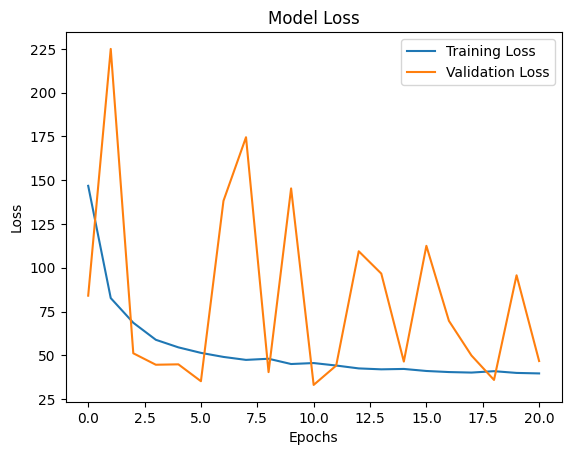

In [25]:
# Plot history - loss curve
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()